<a href="https://colab.research.google.com/github/jiminmini/mini/blob/main/YB_5_16_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [30]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [31]:
# 데이터 로드
data = pd.read_csv("abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [32]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [33]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [34]:
#필요한 모듈 불러오기
# 필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [35]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train,y_train)

#예측값 구하기
y_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_age = y_pred + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


MSE: 5.0132
RMSE: 2.2390


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [36]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [37]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함

alpha_rmse = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    neg_rmse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    mean_rmse = -np.mean(neg_rmse_scores)  # 음수 → 양수 변환
    alpha_rmse[alpha] = mean_rmse
    print(f"Alpha={alpha}: 평균 RMSE = {mean_rmse:.4f}")

best_alpha = min(alpha_rmse, key=alpha_rmse.get)
print(f"\n✅ 가장 낮은 평균 RMSE를 가진 alpha: {best_alpha} (RMSE: {alpha_rmse[best_alpha]:.4f})")

Alpha=0: 평균 RMSE = 2.2446
Alpha=0.1: 평균 RMSE = 2.2371
Alpha=1: 평균 RMSE = 2.2303
Alpha=10: 평균 RMSE = 2.3373
Alpha=100: 평균 RMSE = 2.6212

✅ 가장 낮은 평균 RMSE를 가진 alpha: 1 (RMSE: 2.2303)


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [38]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [39]:
#모델 생성 및 훈련
XGB_reg = XGBRegressor()
XGB_reg.fit(X_train,y_train)

#예측값 구하기
XGB_pred = XGB_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
XGB_pred_age = XGB_pred + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test,XGB_pred)
rmse = np.sqrt(mse)
print('MSE:',mse)
print('RMSE',rmse)

MSE: 5.454935073852539
RMSE 2.335580243505356


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

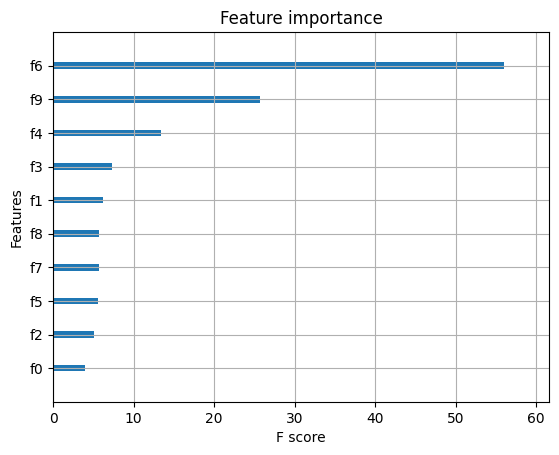

In [40]:
import seaborn as sns
%matplotlib inline
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(XGB_reg, importance_type='gain',show_values=False)
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [16]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [17]:
wine = load_wine()

x = wine.data # x변수
y = wine.target # y변수

## 2) train/test 셋 분리

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [23]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀모델 생성 (다중 클래스 분류이므로 기본 설정 사용)
model = LogisticRegression(max_iter=1000)

# 모델 훈련
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [24]:
#기울기
print("기울기 (계수):\n", model.coef_)

기울기 (계수):
 [[-4.96429625e-01  5.36751015e-01  6.77876404e-01 -2.91296922e-01
   7.42132329e-04  1.35721997e-01  1.01362941e+00  1.14729615e-01
  -9.07912129e-02  4.63017606e-02 -2.24580579e-01  5.37034763e-01
   9.21897462e-03]
 [ 6.42193077e-01 -8.67206745e-01 -7.17360532e-01  1.92521278e-01
  -2.48723088e-02  3.95774753e-01 -9.28541506e-02  2.09352651e-01
   5.88471149e-01 -7.45552918e-01  7.51225052e-01  1.55946921e-01
  -7.86336524e-03]
 [-1.45763452e-01  3.30455730e-01  3.94841275e-02  9.87756432e-02
   2.41301765e-02 -5.31496750e-01 -9.20775255e-01 -3.24082266e-01
  -4.97679936e-01  6.99251158e-01 -5.26644473e-01 -6.92981685e-01
  -1.35560939e-03]]


In [25]:
#절편
print("절편:\n", model.intercept_)

절편:
 [-1.07156036  1.44899644 -0.37743608]


3-3) 모델의 정확도를 구하세요.

In [28]:
#모델의 예측값 구하기
y_pred = model.predict(x_test)

#모델의 정확도 구하기
accuracy = model.score(x_test, y_test)
print("모델 정확도: {:.2f}%".format(accuracy * 100))

모델 정확도: 92.59%
